Import Necessary Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import re 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    accuracy_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    confusion_matrix
)
import json
from pandas import json_normalize
from datetime import datetime
from matplotlib.patches import Circle

In [2]:
df = pd.read_csv('training.csv', sep=';', low_memory=False)
df

,timestamp,datetime_utc,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,_id.$oid,...,dlMcs,ulMcs,ulBler,ri,pcmax,puschSnr,dlBler,phr,rsrq,sinr
0,1.750111e+12,2025-06-17T00:00:00.300000+02:00,985.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e02604a8675b1f3c3b,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
1,1.750111e+12,2025-06-17T00:00:01.300000+02:00,61.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e12604a8675b1f3c3c,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
2,1.750111e+12,2025-06-17T00:00:02.300000+02:00,161.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e22604a8675b1f3c3d,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
3,1.750111e+12,2025-06-17T00:00:03.300000+02:00,261.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e32604a8675b1f3c3e,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
4,1.750111e+12,2025-06-17T00:00:04.300000+02:00,361.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e42604a8675b1f3c3f,...,9.0,9.0,0.0,2.0,16.0,15.5,0.0,52.0,-10.5,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162603,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,9.0,8.0,0.0,2.0,24.0,19.0,0.0,52.0,-10.5,23.5
162604,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,5.0,6.0,0.0,2.0,24.0,19.0,0.0,52.0,-10.5,23.5
162605,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,9.0,6.0,0.0,2.0,25.0,9.5,0.0,52.0,-10.5,23.5
162606,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,9.0,8.0,0.0,4.0,22.0,12.5,0.0,52.0,-10.5,23.5


Training DATA Analysis

In [3]:
df.shape # size of the training data (#rows, #features)

(162608, 30)

In [4]:
df.head(5)

,timestamp,datetime_utc,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,_id.$oid,...,dlMcs,ulMcs,ulBler,ri,pcmax,puschSnr,dlBler,phr,rsrq,sinr
0,1.750111e+12,2025-06-17T00:00:00.300000+02:00,985.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e02604a8675b1f3c3b,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
1,1.750111e+12,2025-06-17T00:00:01.300000+02:00,61.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e12604a8675b1f3c3c,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
2,1.750111e+12,2025-06-17T00:00:02.300000+02:00,161.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e22604a8675b1f3c3d,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
3,1.750111e+12,2025-06-17T00:00:03.300000+02:00,261.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e32604a8675b1f3c3e,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
4,1.750111e+12,2025-06-17T00:00:04.300000+02:00,361.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e42604a8675b1f3c3f,...,9.0,9.0,0.0,2.0,16.0,15.5,0.0,52.0,-10.5,23.5


In [5]:

#is_all_same = df['pmi'].nunique() == 1

#print(is_all_same)

In [6]:
df.shape # size of the training data (#rows, #features)

(162608, 30)

In [7]:
df.describe()

,timestamp,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,ulBytes,rsrp,...,inSync,dlBytes,dlMcs,ulMcs,ri,pcmax,puschSnr,phr,rsrq,sinr
count,1.626080e+05,162608.000000,162608.000000,162608.0,162608.0,1.626080e+05,1.626080e+05,160238.000000,1.626080e+05,162608.000000,...,162608.000000,1.626080e+05,162608.000000,162608.000000,162608.000000,162608.000000,162608.000000,162608.000000,156339.000000,156339.000000
mean,1.750177e+12,512.353599,11.836509,0.0,12345678.0,3.750240e+09,3.750240e+09,3.290020,2.003371e+07,-79.431307,...,0.977578,1.605931e+07,7.971994,7.464362,2.380406,21.460568,15.618324,50.281714,-10.525659,23.221746
std,1.867393e+07,295.549577,6.522685,0.0,0.0,0.000000e+00,0.000000e+00,0.628294,2.689743e+07,14.120917,...,0.148052,1.843210e+08,2.421794,1.391054,0.803336,3.558740,4.477406,5.026631,0.128980,1.334077
min,1.750111e+12,0.000000,3.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.000000,0.000000e+00,-121.000000,...,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,-7.000000,-12.500000,5.500000
25%,1.750172e+12,256.000000,4.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.100000,1.862440e+06,-85.000000,...,1.000000,7.039400e+05,8.000000,6.000000,2.000000,16.000000,11.000000,52.000000,-10.500000,23.500000
50%,1.750181e+12,512.000000,9.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.200000,7.526318e+06,-82.000000,...,1.000000,2.228972e+06,9.000000,7.000000,2.000000,24.000000,18.000000,52.000000,-10.500000,23.500000
75%,1.750189e+12,767.000000,19.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.300000,2.730925e+07,-78.000000,...,1.000000,5.050341e+06,9.000000,9.000000,2.000000,24.000000,19.000000,52.000000,-10.500000,23.500000
max,1.750198e+12,1023.000000,19.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,13.000000,1.148044e+08,0.000000,...,1.000000,3.652901e+09,27.000000,27.000000,4.000000,25.000000,53.000000,65.000000,-10.500000,23.500000


In [8]:
#features in the data
df.columns

Index(['timestamp', 'datetime_utc', 'frame', 'slot', 'pci', 'id',
       'dlCarrierFreq', 'ulCarrierFreq', 'avgLdpcIterations', '_id.$oid',
       'rnti', 'ulBytes', 'pmi', 'rsrp', 'cqi', 'pucchSnr', 'rssi', 'ueId',
       'inSync', 'dlBytes', 'dlMcs', 'ulMcs', 'ulBler', 'ri', 'pcmax',
       'puschSnr', 'dlBler', 'phr', 'rsrq', 'sinr'],
      dtype='object')

In [9]:
df.dropna(inplace = True) # dropping NaN Values i.e removing all empty noisy data
df.shape # size after removing NaN values

(155279, 30)

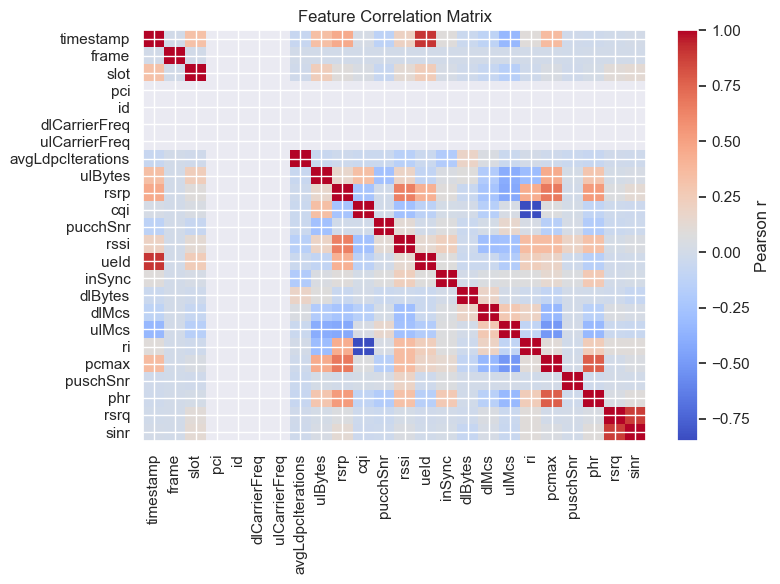

In [10]:
#Analysing the correlation between features (Only Numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols] .corr()
scaler = StandardScaler()
df1 = pd.DataFrame()
df1[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#print("Correlation matrix:\n", corr)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Removing 2% of outliers/Noisy data using Isolation Forest

In [11]:
from sklearn.ensemble import IsolationForest

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iso = IsolationForest(contamination=0.01, random_state=42)
df['iforest_label'] = iso.fit_predict(df[numeric_cols])
# label = −1 is an outlier
n_iso = (df['iforest_label'] == -1).sum()
print("IsolationForest outliers:", n_iso, f"({n_iso/len(df):.2%})")

IsolationForest outliers: 1553 (1.00%)


In [12]:
df = df[df['iforest_label'] == 1].reset_index(drop=True) #keeping only inliners
df.drop(columns=['iforest_label'], inplace=True)

In [13]:
df.describe()

,timestamp,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,ulBytes,rsrp,...,inSync,dlBytes,dlMcs,ulMcs,ri,pcmax,puschSnr,phr,rsrq,sinr
count,1.537260e+05,153726.000000,153726.000000,153726.0,153726.0,1.537260e+05,1.537260e+05,153726.000000,1.537260e+05,153726.000000,...,153726.000000,1.537260e+05,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000
mean,1.750179e+12,512.560757,11.861676,0.0,12345678.0,3.750240e+09,3.750240e+09,3.247596,2.103871e+07,-81.574379,...,0.998751,1.045466e+07,7.999766,7.508632,2.401962,21.647223,15.847501,50.602325,-10.524375,23.240399
std,1.709821e+07,295.479180,6.564988,0.0,0.0,0.000000e+00,0.000000e+00,0.348767,2.722655e+07,3.653002,...,0.035319,1.244040e+08,2.388739,1.374157,0.810654,3.408019,4.116930,2.892530,0.126557,1.288369
min,1.750111e+12,0.000000,3.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.000000,0.000000e+00,-99.000000,...,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,-12.500000,8.500000
25%,1.750173e+12,258.000000,4.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.100000,2.352379e+06,-85.000000,...,1.000000,8.543982e+05,9.000000,6.000000,2.000000,16.000000,11.000000,52.000000,-10.500000,23.500000
50%,1.750182e+12,513.000000,9.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.200000,8.482468e+06,-82.000000,...,1.000000,2.410364e+06,9.000000,7.000000,2.000000,24.000000,18.000000,52.000000,-10.500000,23.500000
75%,1.750190e+12,768.000000,19.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.300000,2.941394e+07,-78.000000,...,1.000000,5.165862e+06,9.000000,9.000000,2.000000,24.000000,19.000000,52.000000,-10.500000,23.500000
max,1.750198e+12,1023.000000,19.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,9.700000,1.148044e+08,-69.000000,...,1.000000,3.652848e+09,27.000000,27.000000,4.000000,25.000000,38.500000,65.000000,-10.500000,23.500000


In [14]:
#features in the data
df.columns

Index(['timestamp', 'datetime_utc', 'frame', 'slot', 'pci', 'id',
       'dlCarrierFreq', 'ulCarrierFreq', 'avgLdpcIterations', '_id.$oid',
       'rnti', 'ulBytes', 'pmi', 'rsrp', 'cqi', 'pucchSnr', 'rssi', 'ueId',
       'inSync', 'dlBytes', 'dlMcs', 'ulMcs', 'ulBler', 'ri', 'pcmax',
       'puschSnr', 'dlBler', 'phr', 'rsrq', 'sinr'],
      dtype='object')

Considering the following features for user signature:
'rsrp', 'rsrq', 'rssi', 'sinr',
'pucchSnr', 'puschSnr', 'ulBler', 'dlBler',
'dlMcs', 'ulMcs',
'ulBytes', 'dlBytes',
'inSync'


In [15]:
to_drop = ['datetime_utc',
    '_id.$oid', 'id', 'ueId', 'cqi',    # network IDs
    'timestamp', 'frame', 'slot',       # timing/order markers
    'pci', 'ulCarrierFreq', 'dlCarrierFreq',  # cell/carrier config
     'ri',  'phr', 'pmi', 'pcmax','avgLdpcIterations'   # control/scheduling
           #'dlMcs', 'ulMcs',
    #'ulBytes', 'dlBytes', 'inSync' ,    # traffic & state
]

df = df.drop(columns=to_drop, errors='ignore')

df.columns

Index(['rnti', 'ulBytes', 'rsrp', 'pucchSnr', 'rssi', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'puschSnr', 'dlBler', 'rsrq', 'sinr'],
      dtype='object')

In [16]:
df.head(5)

,rnti,ulBytes,rsrp,pucchSnr,rssi,inSync,dlBytes,dlMcs,ulMcs,ulBler,puschSnr,dlBler,rsrq,sinr
0,4a4b,6701204.0,-89.0,13.0,78.1,1.0,21874649.0,9.0,9.0,0.0,14.5,0.0,-10.5,23.5
1,4a4b,6703712.0,-89.0,13.0,78.0,1.0,21875491.0,9.0,9.0,0.0,14.5,0.0,-10.5,23.5
2,4a4b,6706220.0,-89.0,13.0,78.0,1.0,21876333.0,9.0,9.0,0.0,15.0,0.0,-10.5,23.5
3,4a4b,6708519.0,-89.0,14.0,78.0,1.0,21877175.0,9.0,9.0,0.0,15.0,0.0,-10.5,23.5
4,4a4b,6711027.0,-89.0,13.0,78.1,1.0,21878049.0,9.0,9.0,0.0,15.5,0.0,-10.5,23.5


In [17]:
rnti_series = df['rnti']
rnti_changes = rnti_series != rnti_series.shift(1)

# Step 2: Assign a group ID per RNTI segment (change block)
rnti_groups = rnti_changes.cumsum()

# Step 3: Analyze durations
rnti_durations = (
    pd.DataFrame({'rnti': rnti_series, 'group': rnti_groups})
    .groupby('group')
    .agg(rnti_value=('rnti', 'first'), duration=('rnti', 'count'))
    .reset_index(drop=True)
)
rnti_durations

,rnti_value,duration
0,4a4b,635
1,de7f,15
2,147e,1
3,2bc5,1050
4,5819,16
...,...,...
145274,"8,00E+04",1
145275,53d6,1
145276,6dd6,1
145277,8edd,1


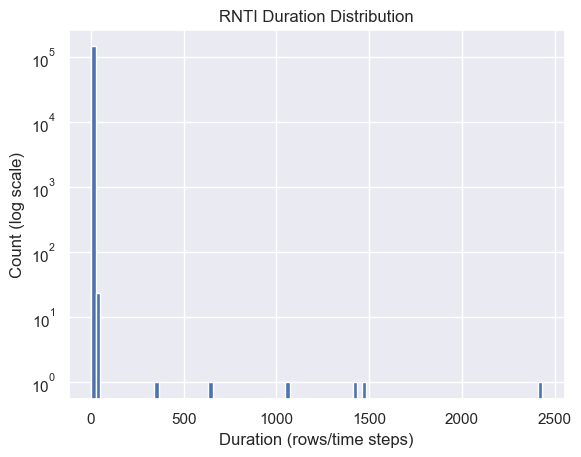

In [18]:
rnti_durations['duration'].hist(bins=100, log=True)
plt.title("RNTI Duration Distribution")
plt.xlabel("Duration (rows/time steps)")
plt.ylabel("Count (log scale)")
plt.show()

In [19]:
long_lived = rnti_durations[rnti_durations['duration'] > 250]
valid_rntis = long_lived['rnti_value'].unique()
print(valid_rntis)

['4a4b' '2bc5' 'd8e1' 'c8ff' 'e51f' '38dd']


In [20]:
df = df[df['rnti'].isin(valid_rntis)]

In [21]:
df.describe()

,ulBytes,rsrp,pucchSnr,rssi,inSync,dlBytes,dlMcs,ulMcs,puschSnr,rsrq,sinr
count,7.361000e+03,7361.000000,7361.000000,7361.000000,7361.0,7.361000e+03,7361.000000,7361.000000,7361.000000,7361.000000,7361.000000
mean,3.576190e+06,-88.994702,15.957207,79.213069,1.0,2.189698e+07,9.385817,9.255672,16.264978,-10.500475,23.459313
std,2.490556e+06,0.648241,1.348082,1.182374,0.0,8.598715e+07,2.431850,1.689032,1.062702,0.015413,0.404721
min,4.694000e+03,-96.000000,4.000000,65.000000,1.0,4.085000e+03,5.000000,7.000000,5.500000,-11.000000,16.000000
25%,1.647021e+06,-89.000000,15.000000,78.800000,1.0,1.251546e+06,9.000000,9.000000,15.500000,-10.500000,23.500000
50%,2.961736e+06,-89.000000,16.000000,79.700000,1.0,1.883885e+06,9.000000,9.000000,16.500000,-10.500000,23.500000
75%,5.004192e+06,-89.000000,17.000000,79.900000,1.0,3.441866e+06,9.000000,9.000000,17.000000,-10.500000,23.500000
max,1.003586e+07,-69.000000,27.000000,86.000000,1.0,4.376006e+08,27.000000,27.000000,26.500000,-10.500000,23.500000


In [22]:
df.columns

Index(['rnti', 'ulBytes', 'rsrp', 'pucchSnr', 'rssi', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'puschSnr', 'dlBler', 'rsrq', 'sinr'],
      dtype='object')

In [23]:
raw_cols = ['ulBytes', 'rsrp', 'pucchSnr', 'rssi', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'puschSnr', 'dlBler', 'rsrq', 'sinr']

In [24]:
for col in raw_cols:
    bad_values = df[col].astype(str).str.contains(",", regex=False)
    if bad_values.any():
        print(f"Issue in column '{col}':")
        print(df.loc[bad_values, col])

Issue in column 'ulBler':
90      7,00E-06
91      3,00E-06
92      1,00E-06
674     8,00E-06
675     3,00E-06
          ...   
7022    6,00E-05
7024    8,00E-06
7025    3,00E-06
7026    1,00E-06
7883    3,00E-06
Name: ulBler, Length: 120, dtype: object
Issue in column 'dlBler':
663     9,00E-06
664     4,00E-06
665     2,00E-06
666     1,00E-06
1724    3,00E-05
          ...   
7940    1,00E-06
7941    1,00E-06
7942    1,00E-06
7943    1,00E-06
7944    1,00E-06
Name: dlBler, Length: 244, dtype: object


In [25]:
bad_rows = df['ulBler'].astype(str).str.count(r'\.') > 1
print(df[bad_rows])
df = df[~bad_rows]

Empty DataFrame
Columns: [rnti, ulBytes, rsrp, pucchSnr, rssi, inSync, dlBytes, dlMcs, ulMcs, ulBler, puschSnr, dlBler, rsrq, sinr]
Index: []


In [26]:
for col in ['ulBler', 'dlBler']:
    count = df[col].astype(str).str.count(r'\.').gt(1).sum()
    print(f"Column '{col}' has {count} values with multiple dots.")

Column 'ulBler' has 0 values with multiple dots.
Column 'dlBler' has 0 values with multiple dots.


In [27]:
for col in ['ulBler', 'dlBler']:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)

In [28]:

scaler_raw = StandardScaler() # Normalise
df_scaled = pd.DataFrame() # A new DataFrame to work on
df_scaled[raw_cols] = scaler_raw.fit_transform(df[raw_cols])


In [29]:
df_scaled['rnti']= df['rnti'] 

In [30]:
df_scaled.head()

,ulBytes,rsrp,pucchSnr,rssi,inSync,dlBytes,dlMcs,ulMcs,ulBler,puschSnr,dlBler,rsrq,sinr,rnti
0,1.254831,-0.008174,-2.193789,-0.941449,0.0,-0.00026,-0.158662,-0.151382,-0.119767,-1.660952,-0.177467,0.030852,0.100539,4a4b
1,1.255838,-0.008174,-2.193789,-1.026030,0.0,-0.00025,-0.158662,-0.151382,-0.119767,-1.660952,-0.177467,0.030852,0.100539,4a4b
2,1.256845,-0.008174,-2.193789,-1.026030,0.0,-0.00024,-0.158662,-0.151382,-0.119767,-1.190422,-0.177467,0.030852,0.100539,4a4b
3,1.257768,-0.008174,-1.451944,-1.026030,0.0,-0.00023,-0.158662,-0.151382,-0.119767,-1.190422,-0.177467,0.030852,0.100539,4a4b
4,1.258775,-0.008174,-2.193789,-0.941449,0.0,-0.00022,-0.158662,-0.151382,-0.119767,-0.719891,-0.177467,0.030852,0.100539,4a4b


CREATING TIME WINDOWED SEQUENCES for each window: the mean of the features and their corresponding correalations are captured

In [31]:
def rolling_windows(df, window_size=1, step=1):
    X = []
    for start in range(0, len(df) - window_size + 1, step):
        window = df.iloc[start:start+window_size].values
        X.append(window)
    return np.stack(X)

X_seq = rolling_windows(df_scaled.drop(columns = ['rnti']), window_size=1, step=1)

In [32]:
print(X_seq.shape)         # Should be (n_windows, 50, 8)
print(X_seq.dtype)# Should be float32 or float64
#X_seq = X_seq.astype(np.float32)

(7361, 1, 13)
float64


In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D

input_layer = Input(shape=(1, 13))

# Encoder
x = Conv1D(16, 3, activation='relu', padding='same')(input_layer)
encoded = MaxPooling1D(2, padding='same')(x)  # (25, 16)

# Decoder
x = Conv1D(16, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)  # (50, 16)
decoded = Conv1D(13, 3, activation='linear', padding='same')(x)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_seq, X_seq, epochs=300, batch_size=96, validation_split=0.3)





Epoch 1/300

54/54 [==============================] - 1s 7ms/step - loss: 0.2885 - val_loss: 2.1315
Epoch 2/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1720 - val_loss: 1.8238
Epoch 3/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 1.6409
Epoch 4/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 1.5975
Epoch 5/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 1.5499
Epoch 6/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 1.4930
Epoch 7/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 1.4422
Epoch 8/300
54/54 [==============================] - 0s 4ms/step - loss: 0.0287 - val_loss: 1.3877
Epoch 9/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 1.3476
Epoch 10/300
54/54 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 1.3191
Epoc

54/54 [==============================] - 0s 2ms/step - loss: 2.5973e-04 - val_loss: 1.0312
Epoch 72/300
54/54 [==============================] - 0s 2ms/step - loss: 2.7472e-04 - val_loss: 1.0298
Epoch 73/300
54/54 [==============================] - 0s 3ms/step - loss: 2.3313e-04 - val_loss: 1.0280
Epoch 74/300
54/54 [==============================] - 0s 2ms/step - loss: 2.3404e-04 - val_loss: 1.0279
Epoch 75/300
54/54 [==============================] - 0s 2ms/step - loss: 2.3399e-04 - val_loss: 1.0265
Epoch 76/300
54/54 [==============================] - 0s 2ms/step - loss: 2.2820e-04 - val_loss: 1.0273
Epoch 77/300
54/54 [==============================] - 0s 2ms/step - loss: 2.1857e-04 - val_loss: 1.0248
Epoch 78/300
54/54 [==============================] - 0s 2ms/step - loss: 2.2161e-04 - val_loss: 1.0245
Epoch 79/300
54/54 [==============================] - 0s 2ms/step - loss: 2.0924e-04 - val_loss: 1.0240
Epoch 80/300
54/54 [==============================] - 0s 2ms/step - loss: 2.2

54/54 [==============================] - 0s 2ms/step - loss: 6.5364e-05 - val_loss: 0.9194
Epoch 150/300
54/54 [==============================] - 0s 3ms/step - loss: 6.8333e-05 - val_loss: 0.9163
Epoch 151/300
54/54 [==============================] - 0s 3ms/step - loss: 7.1051e-05 - val_loss: 0.9153
Epoch 152/300
54/54 [==============================] - 0s 2ms/step - loss: 7.2009e-05 - val_loss: 0.9145
Epoch 153/300
54/54 [==============================] - 0s 2ms/step - loss: 9.8261e-05 - val_loss: 0.9116
Epoch 154/300
54/54 [==============================] - 0s 2ms/step - loss: 6.6960e-05 - val_loss: 0.9100
Epoch 155/300
54/54 [==============================] - 0s 3ms/step - loss: 1.2067e-04 - val_loss: 0.9085
Epoch 156/300
54/54 [==============================] - 0s 3ms/step - loss: 8.3239e-05 - val_loss: 0.9043
Epoch 157/300
54/54 [==============================] - 0s 2ms/step - loss: 6.3121e-05 - val_loss: 0.9051
Epoch 158/300
54/54 [==============================] - 0s 2ms/step - 

54/54 [==============================] - 0s 2ms/step - loss: 2.3239e-05 - val_loss: 0.8525
Epoch 228/300
54/54 [==============================] - 0s 2ms/step - loss: 2.3641e-05 - val_loss: 0.8551
Epoch 229/300
54/54 [==============================] - 0s 2ms/step - loss: 2.8969e-05 - val_loss: 0.8552
Epoch 230/300
54/54 [==============================] - 0s 2ms/step - loss: 1.9213e-05 - val_loss: 0.8545
Epoch 231/300
54/54 [==============================] - 0s 2ms/step - loss: 3.2269e-05 - val_loss: 0.8556
Epoch 232/300
54/54 [==============================] - 0s 2ms/step - loss: 6.5870e-05 - val_loss: 0.8545
Epoch 233/300
54/54 [==============================] - 0s 2ms/step - loss: 5.0787e-05 - val_loss: 0.8541
Epoch 234/300
54/54 [==============================] - 0s 2ms/step - loss: 5.8269e-05 - val_loss: 0.8536
Epoch 235/300
54/54 [==============================] - 0s 2ms/step - loss: 3.8768e-05 - val_loss: 0.8528
Epoch 236/300
54/54 [==============================] - 0s 2ms/step - 

In [34]:
# Use the encoder layers (up to 'encoded') to extract features
encoder = Model(inputs=autoencoder.input, outputs=encoded)
latent = encoder.predict(X_seq)  # shape: (n_windows, 13, 16)
latent_flat = latent.reshape(latent.shape[0], -1)  # flatten: shape = (n_windows, 13*16)


231/231 [==============================] - 0s 855us/step


In [35]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(latent_flat)

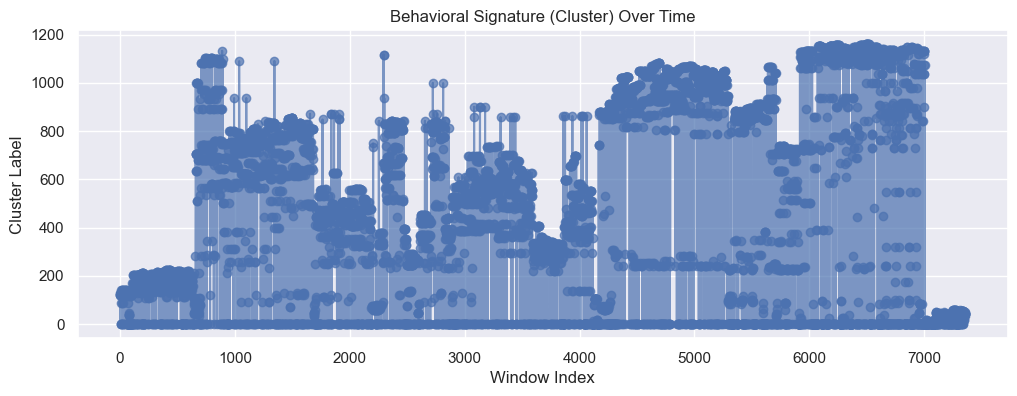

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(cluster_labels, marker='o', linestyle='-', alpha=0.7)
plt.title("Behavioral Signature (Cluster) Over Time")
plt.xlabel("Window Index")
plt.ylabel("Cluster Label")
plt.show()

In [37]:
reconstructed = autoencoder.predict(X_seq)
recon_error = ((X_seq - reconstructed) ** 2).mean(axis=(1, 2))  # MSE per window

231/231 [==============================] - 0s 964us/step


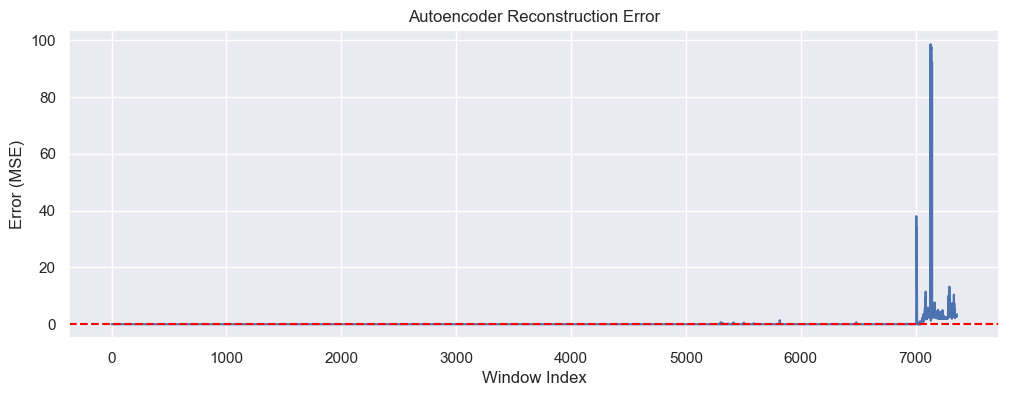

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(recon_error)
plt.axhline(np.percentile(recon_error, 95), color='red', linestyle='--')
plt.title("Autoencoder Reconstruction Error")
plt.xlabel("Window Index")
plt.ylabel("Error (MSE)")
plt.show()

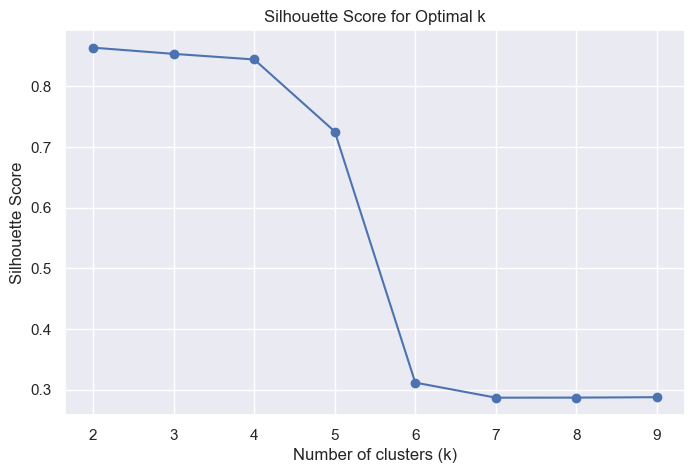

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(latent_flat)
    score = silhouette_score(latent_flat, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), sil_scores, marker='o')
plt.title("Silhouette Score for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



In [40]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(latent_flat)

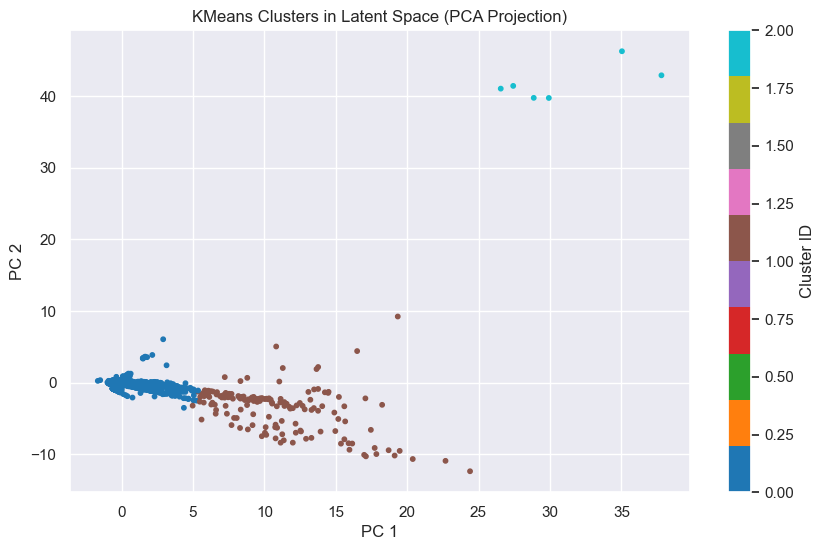

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_result = pca.fit_transform(latent_flat)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='tab10', s=10)
plt.title("KMeans Clusters in Latent Space (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label="Cluster ID")
plt.show()

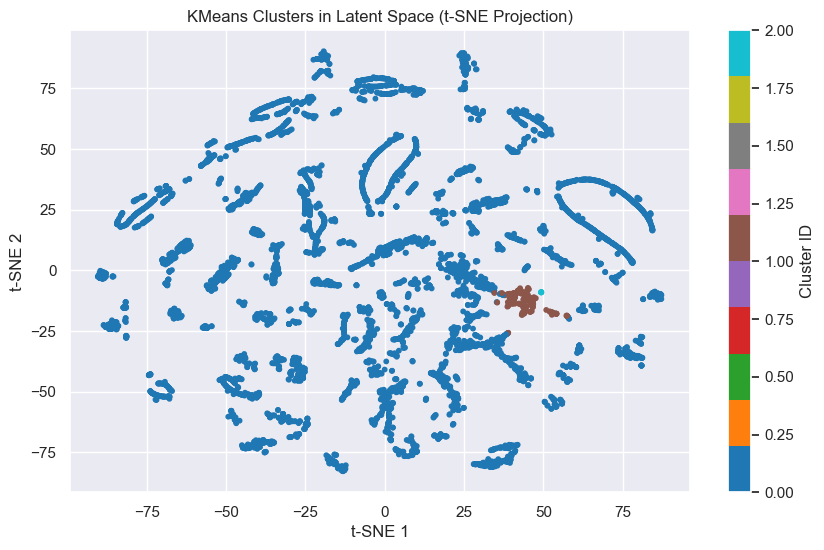

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_embedded = tsne.fit_transform(latent_flat)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_embedded[:, 0], tsne_embedded[:, 1], c=kmeans.labels_, cmap='tab10', s=10)
plt.title("KMeans Clusters in Latent Space (t-SNE Projection)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster ID")
plt.show()

TESTING ON NEW DATA(AUTHENTIC AND NON-AUTHENTIC): READ the DATA FILES THAT You want to test on

In [43]:
#preprocessing test data

In [44]:
#authentic_1_noise_less_antennas.csv
#authentic_2_normal.csv
#authentic_3_obstacles.csv
#non_authentic_1_diff_position.csv
#non_authentic_2_less_antennas_diff_position.csv
#non_authentic_3_no_antennas.csv

In [83]:
df1 = pd.read_csv('non_authentic_3_no_antennas.csv', sep=',', low_memory=False) # read the testing data files

In [84]:
df1.columns

Index(['ulCarrierFreq', 'timestamp', 'id', 'frame', 'slot', 'pci',
       'dlCarrierFreq', '_id.$oid', 'avgLdpcIterations', 'rnti', 'ulBytes',
       'pmi', 'rsrp', 'cqi', 'pucchSnr', 'rssi', 'ueId', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'ri', 'pcmax', 'puschSnr', 'dlBler', 'phr',
       'rsrq', 'sinr'],
      dtype='object')

In [85]:
#drop the Nan values and remove outliers using Isolation Forest

In [86]:
df1.dropna(inplace = True)
numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
iso = IsolationForest(contamination=0.01, random_state=42)
df1['iforest_label'] = iso.fit_predict(df1[numeric_cols])
# label = −1 is an outlier
n_iso = (df1['iforest_label'] == -1).sum()
print("IsolationForest outliers:", n_iso, f"({n_iso/len(df1):.2%})")
df1 = df1[df1['iforest_label'] == 1].reset_index(drop=True)
df1.drop(columns=['iforest_label'], inplace=True)

IsolationForest outliers: 167 (1.00%)


In [87]:
#Keep the features same as training data

to_drop = ['datetime_utc',
    '_id.$oid', 'id', 'ueId',  'cqi',    # network IDs
    'timestamp', 'frame', 'slot',       # timing/order markers
    'pci', 'ulCarrierFreq', 'dlCarrierFreq',  # cell/carrier config
     'ri',  'phr', 'pmi', 'pcmax','avgLdpcIterations'   # control/scheduling
           #'dlMcs', 'ulMcs',
    #'ulBytes', 'dlBytes', 'inSync' ,    # traffic & state
]

df1 = df1.drop(columns=to_drop, errors='ignore')


print(df1.columns)
numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler() # Normalise using StandardSCALER
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
print(df1.head())

Index(['rnti', 'ulBytes', 'rsrp', 'pucchSnr', 'rssi', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'puschSnr', 'dlBler', 'rsrq', 'sinr'],
      dtype='object')
   rnti   ulBytes      rsrp  pucchSnr      rssi    inSync   dlBytes     dlMcs  \
0  30be  1.506026  1.382723  0.376472  0.205716  0.064296  1.389585 -0.071695   
1  23b3  1.206527  0.730811  0.139544 -0.076750  0.064296 -0.081892 -2.324425   
2  308f -0.325478 -1.343455  1.798043 -2.936717  0.064296  0.650707 -1.948970   
3  6695  0.272273 -0.158160  0.376472  0.505836  0.064296  0.703356 -0.071695   
4  7acd -0.168613 -1.402719 -2.703598 -2.936717  0.064296 -0.753275 -0.447150   

      ulMcs    ulBler  puschSnr    dlBler      rsrq      sinr  
0 -0.213052 -1.043344  0.356751  0.048947  0.563005  0.646472  
1 -0.213052  1.087956  0.231272 -0.444511  0.563005  0.558259  
2 -0.213052  1.087956 -1.588159  2.597808 -1.924997 -1.558851  
3 -0.213052  0.983630  0.105794  0.007137  0.563005  0.073088  
4 -0.213052  1.087956 

In [88]:
rnti_series = df1['rnti']
rnti_changes = rnti_series != rnti_series.shift(1)

# Step 2: Assign a group ID per RNTI segment (change block)
rnti_groups = rnti_changes.cumsum()

# Step 3: Analyze durations
rnti_durations = (
    pd.DataFrame({'rnti': rnti_series, 'group': rnti_groups})
    .groupby('group')
    .agg(rnti_value=('rnti', 'first'), duration=('rnti', 'count'))
    .reset_index(drop=True)
)
rnti_durations

,rnti_value,duration
0,30be,1
1,23b3,1
2,308f,1
3,6695,1
4,7acd,1
...,...,...
16512,97e2,1
16513,9582,1
16514,c6ac,1
16515,7de1,1


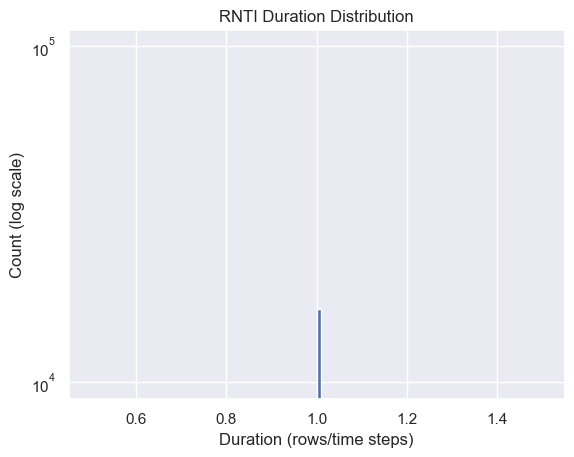

In [89]:
rnti_durations['duration'].hist(bins=100, log=True)
plt.title("RNTI Duration Distribution")
plt.xlabel("Duration (rows/time steps)")
plt.ylabel("Count (log scale)")
plt.show()

In [90]:
long_lived = rnti_durations[rnti_durations['duration'] > 0]
valid_rntis1 = long_lived['rnti_value'].unique()
print(valid_rntis1)

['30be' '23b3' '308f' '6695' '7acd' '896b' '8523' '8f60' '91b4' 'f53c'
 'fcd5' '5c8f' '5dbc' 'd9e0' '1fbe' '2fa4' '8224' '950e' '53ba' 'f27b'
 '8e64' '788a' 'e745' '3553' 'a088' '9582' '8d98' 'c6ac' '7de1' '97e2']


In [91]:
df1.columns

Index(['rnti', 'ulBytes', 'rsrp', 'pucchSnr', 'rssi', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'puschSnr', 'dlBler', 'rsrq', 'sinr'],
      dtype='object')

In [92]:
df1

,rnti,ulBytes,rsrp,pucchSnr,rssi,inSync,dlBytes,dlMcs,ulMcs,ulBler,puschSnr,dlBler,rsrq,sinr
0,30be,1.506026,1.382723,0.376472,0.205716,0.064296,1.389585,-0.071695,-0.213052,-1.043344,0.356751,0.048947,0.563005,0.646472
1,23b3,1.206527,0.730811,0.139544,-0.076750,0.064296,-0.081892,-2.324425,-0.213052,1.087956,0.231272,-0.444511,0.563005,0.558259
2,308f,-0.325478,-1.343455,1.798043,-2.936717,0.064296,0.650707,-1.948970,-0.213052,1.087956,-1.588159,2.597808,-1.924997,-1.558851
3,6695,0.272273,-0.158160,0.376472,0.505836,0.064296,0.703356,-0.071695,-0.213052,0.983630,0.105794,0.007137,0.563005,0.073088
4,7acd,-0.168613,-1.402719,-2.703598,-2.936717,0.064296,-0.753275,-0.447150,-0.213052,1.087956,-1.839115,2.597808,-2.256730,-1.647064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16512,97e2,0.082985,1.441988,0.613401,0.223370,0.064296,0.261347,1.054670,-0.213052,-1.100374,0.482229,-0.482104,0.728872,1.131643
16513,9582,0.036058,0.375223,0.376472,0.435220,0.064296,-0.194027,1.054670,-0.213052,1.087956,0.356751,-0.482104,0.728872,0.690578
16514,c6ac,0.200028,-1.224925,0.613401,0.964843,0.064296,-0.686969,-0.071695,-0.213052,-1.100374,0.482229,-0.165138,-1.427396,-1.382425
16515,7de1,0.116666,-0.217425,0.376472,0.700032,0.064296,0.326391,1.054670,-0.213052,0.106409,0.356751,-0.482104,0.563005,0.161301


In [93]:
df1 = df1[df1['rnti'].isin(valid_rntis1)]

In [94]:
df1

,rnti,ulBytes,rsrp,pucchSnr,rssi,inSync,dlBytes,dlMcs,ulMcs,ulBler,puschSnr,dlBler,rsrq,sinr
0,30be,1.506026,1.382723,0.376472,0.205716,0.064296,1.389585,-0.071695,-0.213052,-1.043344,0.356751,0.048947,0.563005,0.646472
1,23b3,1.206527,0.730811,0.139544,-0.076750,0.064296,-0.081892,-2.324425,-0.213052,1.087956,0.231272,-0.444511,0.563005,0.558259
2,308f,-0.325478,-1.343455,1.798043,-2.936717,0.064296,0.650707,-1.948970,-0.213052,1.087956,-1.588159,2.597808,-1.924997,-1.558851
3,6695,0.272273,-0.158160,0.376472,0.505836,0.064296,0.703356,-0.071695,-0.213052,0.983630,0.105794,0.007137,0.563005,0.073088
4,7acd,-0.168613,-1.402719,-2.703598,-2.936717,0.064296,-0.753275,-0.447150,-0.213052,1.087956,-1.839115,2.597808,-2.256730,-1.647064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16512,97e2,0.082985,1.441988,0.613401,0.223370,0.064296,0.261347,1.054670,-0.213052,-1.100374,0.482229,-0.482104,0.728872,1.131643
16513,9582,0.036058,0.375223,0.376472,0.435220,0.064296,-0.194027,1.054670,-0.213052,1.087956,0.356751,-0.482104,0.728872,0.690578
16514,c6ac,0.200028,-1.224925,0.613401,0.964843,0.064296,-0.686969,-0.071695,-0.213052,-1.100374,0.482229,-0.165138,-1.427396,-1.382425
16515,7de1,0.116666,-0.217425,0.376472,0.700032,0.064296,0.326391,1.054670,-0.213052,0.106409,0.356751,-0.482104,0.563005,0.161301


In [95]:
#prepare the time windowed sequences for test data
df1 = df1[raw_cols]

In [96]:
X_seq1 = rolling_windows(df1, window_size=1, step=1)


In [97]:
X_seq1.shape

(16517, 1, 13)

In [98]:
latent_anom = encoder.predict(X_seq1)
latent_anom_flat = latent_anom.reshape(len(latent_anom), -1)

517/517 [==============================] - 0s 696us/step


In [99]:
cluster_anom_labels = kmeans.predict(latent_anom_flat)

In [100]:
X_anom_recon = autoencoder.predict(X_seq1)
recon_error = np.mean((X_seq1 - X_anom_recon)**2, axis=(1,2))  # MSE per window

517/517 [==============================] - 0s 853us/step


In [101]:
X_recon = autoencoder.predict(X_seq)

# Compute Mean Squared Error per window
train_recon_error = np.mean((X_seq - X_recon)**2, axis=(1, 2))

231/231 [==============================] - 0s 854us/step


In [102]:
threshold = np.percentile(train_recon_error, 95)  # or use max if you prefer strict detection
anomalies = recon_error > threshold

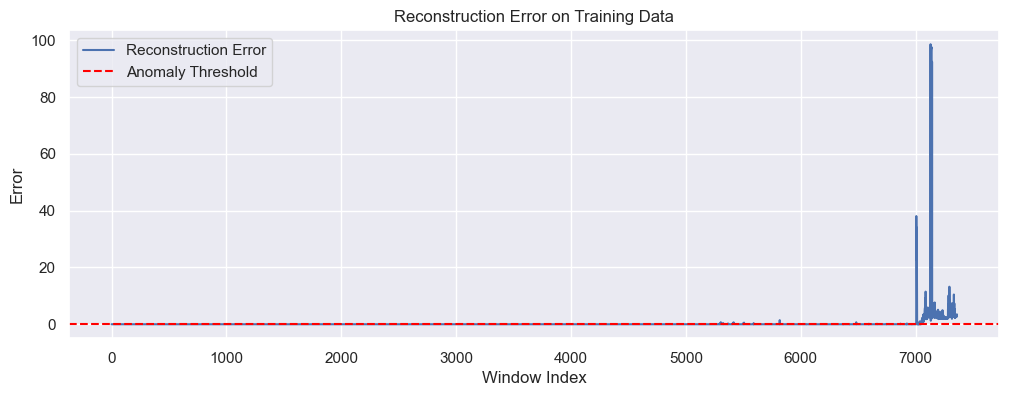

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(train_recon_error, label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error on Training Data")
plt.xlabel("Window Index")
plt.ylabel("Error")
plt.legend()
plt.show()

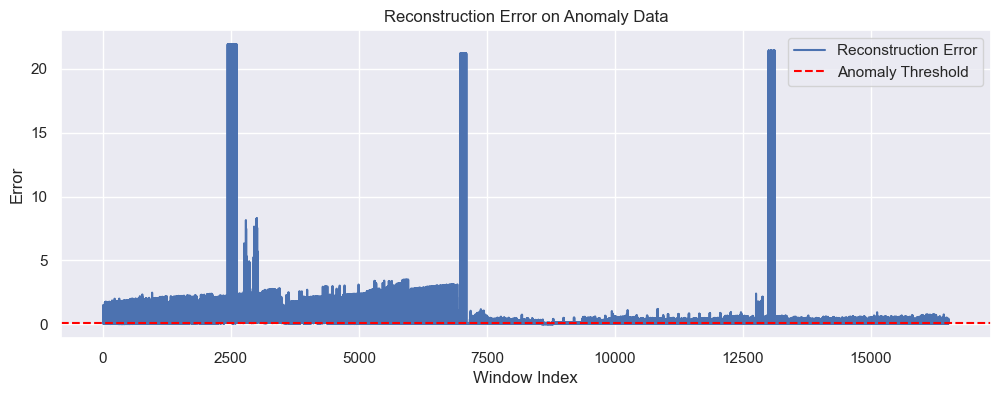

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(recon_error, label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error on Anomaly Data")
plt.xlabel("Window Index")
plt.ylabel("Error")
plt.legend()
plt.show()

In [105]:
from sklearn.metrics import pairwise_distances

# Get cluster centers from the trained KMeans model
centroids = kmeans.cluster_centers_

# Compute distances from each anomaly point to its assigned cluster centroid
assigned_centroids = centroids[cluster_anom_labels]  # shape: (n_anomaly, n_features)
dists = np.linalg.norm(latent_anom_flat - assigned_centroids, axis=1)  # Euclidean distance


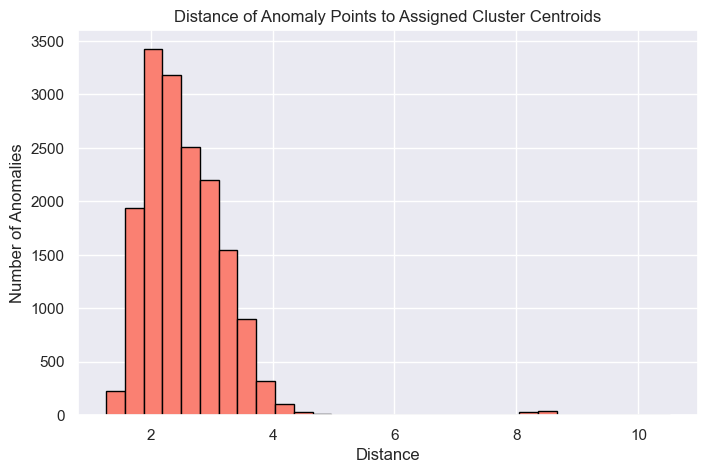

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(dists, bins=30, color='salmon', edgecolor='black')
plt.title('Distance of Anomaly Points to Assigned Cluster Centroids')
plt.xlabel('Distance')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.show()

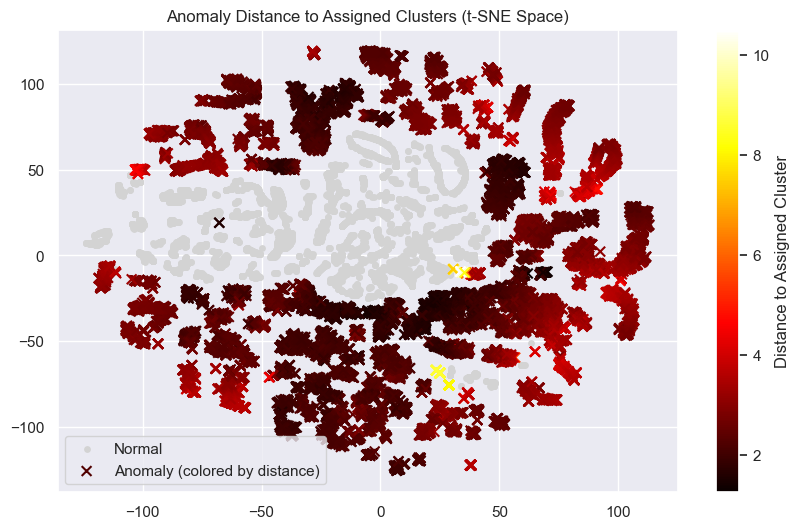

In [107]:
import matplotlib.cm as cm

# Stack train + anomaly for t-SNE again
latent_all = np.vstack([latent_flat, latent_anom_flat])
tsne = TSNE(n_components=2, random_state=42)
tsne_all = tsne.fit_transform(latent_all)

# Slice out anomaly part
tsne_anom = tsne_all[len(latent_flat):]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_all[:len(latent_flat), 0], tsne_all[:len(latent_flat), 1],
            c='lightgray', s=15, label='Normal')

# Overlay anomaly points with distance-based color
sc = plt.scatter(tsne_anom[:, 0], tsne_anom[:, 1],
                 c=dists, cmap='hot', s=50, marker='x', label='Anomaly (colored by distance)')

plt.colorbar(sc, label='Distance to Assigned Cluster')
plt.title('Anomaly Distance to Assigned Clusters (t-SNE Space)')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
y_true = np.concatenate([
    np.zeros(len(latent_flat)),  # normal
    np.ones(len(latent_anom_flat))     # anomaly
])

In [109]:
# Distance from each point to its assigned cluster centroid
train_dists = np.linalg.norm(latent_flat - kmeans.cluster_centers_[kmeans.labels_], axis=1)
anom_dists = np.linalg.norm(latent_anom_flat - kmeans.cluster_centers_[cluster_anom_labels], axis=1)

# Combine
all_dists = np.concatenate([train_dists, anom_dists])

In [117]:
threshold = np.percentile(train_dists, 80)

# Predict: 1 = anomaly, 0 = normal
y_pred = (all_dists > threshold).astype(int)

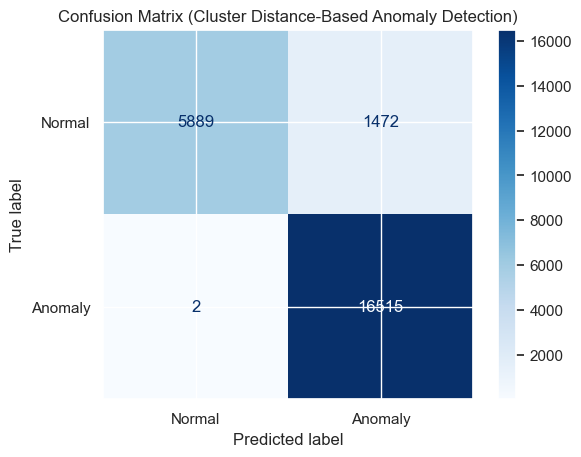

              precision    recall  f1-score   support

      Normal       1.00      0.80      0.89      7361
     Anomaly       0.92      1.00      0.96     16517

    accuracy                           0.94     23878
   macro avg       0.96      0.90      0.92     23878
weighted avg       0.94      0.94      0.94     23878



In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Cluster Distance-Based Anomaly Detection)")
plt.show()

# Optional: metrics
print(classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))

In [112]:
import numpy as np

# Stack normal and anomaly points
latent_all = np.vstack([latent_flat, latent_anom_flat])
labels_all = np.concatenate([np.zeros(len(latent_flat)), np.ones(len(latent_anom_flat))])  # 0=normal, 1=anomaly


In [113]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
latent_2d = tsne.fit_transform(np.vstack([latent_all, kmeans.cluster_centers_])) 

In [114]:
latent_2d_points = latent_2d[:len(latent_all)]                 # normal + anomaly
latent_2d_centroids = latent_2d[len(latent_all):] 

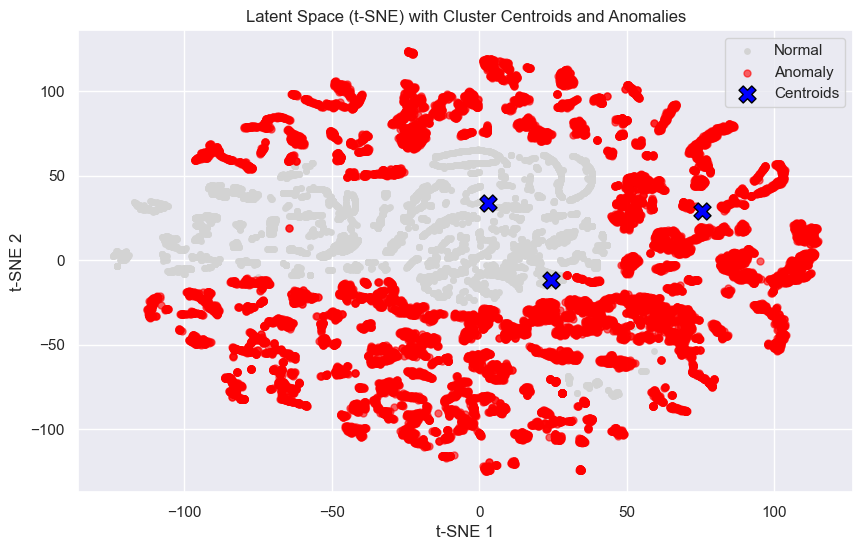

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot normal data
plt.scatter(latent_2d_points[labels_all==0, 0], latent_2d_points[labels_all==0, 1],
            c='lightgray', s=15, label='Normal')

# Plot anomaly data
plt.scatter(latent_2d_points[labels_all==1, 0], latent_2d_points[labels_all==1, 1],
            c='red', s=25, label='Anomaly', alpha=0.6)

# Plot centroids
plt.scatter(latent_2d_centroids[:, 0], latent_2d_centroids[:, 1],
            c='blue', s=150, marker='X', label='Centroids', edgecolors='black')

plt.title('Latent Space (t-SNE) with Cluster Centroids and Anomalies')
plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2')
plt.legend()
plt.grid(True)
plt.show()

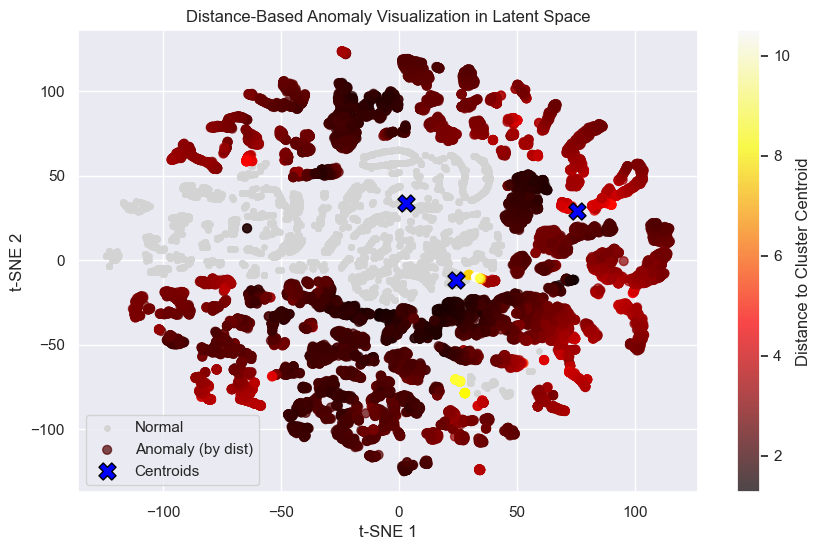

In [116]:
import matplotlib.cm as cm

# Compute distances (already done earlier)
dists = np.linalg.norm(latent_anom_flat - assigned_centroids, axis=1)

# Plot anomaly points with distance color
plt.figure(figsize=(10, 6))
plt.scatter(latent_2d_points[labels_all==0, 0], latent_2d_points[labels_all==0, 1],
            c='lightgray', s=15, label='Normal')

sc = plt.scatter(latent_2d_points[labels_all==1, 0], latent_2d_points[labels_all==1, 1],
                 c=dists, cmap='hot', s=40, label='Anomaly (by dist)', alpha=0.7)

plt.scatter(latent_2d_centroids[:, 0], latent_2d_centroids[:, 1],
            c='blue', s=150, marker='X', label='Centroids', edgecolors='black')

plt.colorbar(sc, label='Distance to Cluster Centroid')
plt.title('Distance-Based Anomaly Visualization in Latent Space')
plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2')
plt.legend()
plt.grid(True)
plt.show()